In [1]:
import sqlite3
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

Коды валют и котировки на данный момент

In [2]:
url1 = 'http://www.cbr.ru/scripts/XML_daily.asp?date_req=20/06/2025'
pd.read_xml(url1, encoding='cp1251')

,ID,NumCode,CharCode,Nominal,Name,Value,VunitRate
0,R01010,36,AUD,1,Австралийский доллар,"50,7477","50,7477"
1,R01020A,944,AZN,1,Азербайджанский манат,"46,1670","46,167"
2,R01035,826,GBP,1,Фунт стерлингов,"105,5765","105,5765"
3,R01060,51,AMD,100,Армянских драмов,"20,3955","0,203955"
4,R01090B,933,BYN,1,Белорусский рубль,"26,3696","26,3696"
5,R01100,975,BGN,1,Болгарский лев,"46,1795","46,1795"
6,R01115,986,BRL,1,Бразильский реал,"14,3020","14,302"
7,R01135,348,HUF,100,Форинтов,"22,3512","0,223512"
8,R01150,704,VND,10000,Донгов,"31,3622","0,00313622"
9,R01200,344,HKD,1,Гонконгский доллар,"10,0158","10,0158"


Курс доллара

In [3]:
url = 'https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2017&date_req2=01/06/2025&VAL_NM_RQ=R01235'
df = pd.read_xml(url)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # дата в формате дд.мм.гггг
df = df.set_index("Date")
df['usd_rub'] = df['VunitRate'].str.replace(',', '.').astype(float)

df.drop(["Id", "Nominal", "Value", 'VunitRate'], axis=1, inplace = True)
print(df)

            usd_rub
Date               
2017-01-10  59.8961
2017-01-11  59.9533
2017-01-12  60.1614
2017-01-13  59.4978
2017-01-14  59.3700
...             ...
2025-05-27  79.6588
2025-05-28  79.6176
2025-05-29  79.6037
2025-05-30  78.4970
2025-05-31  78.6171

[2071 rows x 1 columns]


<Axes: xlabel='Date'>

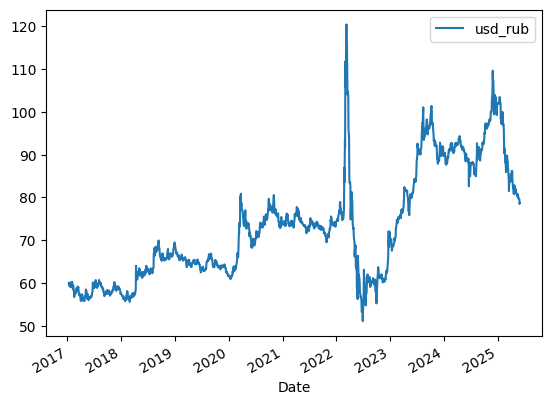

In [4]:
df.plot()

<Axes: xlabel='Date'>

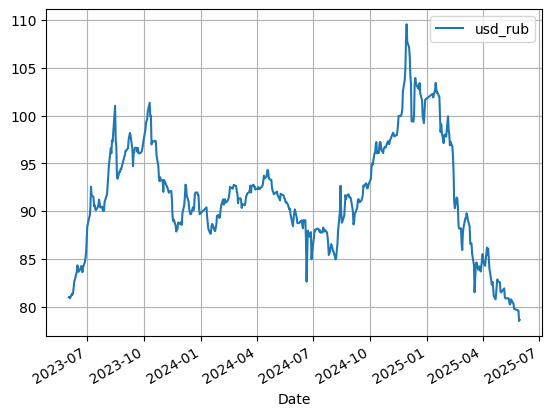

In [5]:
df_cut = df.loc['2023-06-01':'2025-06-01']
df_cut.plot(grid=True)

Очистка данных

In [27]:
def find_anomaly(data_value, window_mean):
    diff = abs(data_value - window_mean) / data_value
    return(diff > 0.1)

In [43]:
df_cut.loc['2023-07-01', 'usd_rub']

np.float64(88.3844)

In [ ]:
w = 7
windows = df_cut.rolling(w).mean()
windows.dropna(inplace = True)
for date in windows.index:
    if find_anomaly(df_cut.loc[date, 'usd_rub'], windows.loc[date, 'usd_rub']):
        print(df_cut.loc[date, 'usd_rub'])
#    print(str(df_cut.loc[str(i)]) + ', window = ' + str(df_cut.rolling(7).mean().loc[str(i)]))

In [30]:
df_cut

,usd_rub
Date,
2023-06-01,80.9942
2023-06-02,80.9657
2023-06-03,80.8756
2023-06-06,81.3294
2023-06-07,81.2502
...,...
2025-05-27,79.6588
2025-05-28,79.6176
2025-05-29,79.6037


In [31]:
df_cut.rolling(7).mean().loc['2023-06-09':'2023-06-21']

,usd_rub
Date,
2023-06-09,81.280886
2023-06-10,81.516243
2023-06-14,81.898357
2023-06-15,82.391114
2023-06-16,82.767071
2023-06-17,83.109871
2023-06-20,83.471086
2023-06-21,83.776886


Оценка стационарности

In [36]:
result = adfuller(df_cut['usd_rub'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value {key}: {value}")

ADF Statistic: -1.903389452880911
p-value: 0.33046828900484726
Critical Value 1%: -3.4436298692815304
Critical Value 5%: -2.867396599893435
Critical Value 10%: -2.5698893429241916


In [ ]:
result = kpss(df_cut['GDP'], regression='c', nlags='auto')
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Результат: ряд {"стационарен" if result[1] > 0.05 else "нестационарен"}')

In [27]:
split_date = '2025-01-01'
train = df_cut.loc[:split_date]
test = df_cut.loc[split_date:]

In [14]:
connection = sqlite3.connect('curr.sqlite')
cursor = connection.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
for table in tables:
    print(table[0])
connection.close()

curr_RC


In [15]:
connection = sqlite3.connect('curr.sqlite')
cursor = connection.cursor()
cursor.execute('SELECT * FROM curr_RC')
users = cursor.fetchall()
for user in users:
  print(user)
connection.close()

('1.0', '29-Dec-2024', '101.6797', 'Доллар США')
('1.0', '28-Dec-2024', '100.5281', 'Доллар США')
('1.0', '27-Dec-2024', '99.2295', 'Доллар США')
('1.0', '26-Dec-2024', '99.6125', 'Доллар США')
('1.0', '25-Dec-2024', '99.8729', 'Доллар США')
('1.0', '24-Dec-2024', '101.6143', 'Доллар США')
('1.0', '21-Dec-2024', '102.3438', 'Доллар США')
('1.0', '20-Dec-2024', '103.4207', 'Доллар США')
('1.0', '19-Dec-2024', '102.7763', 'Доллар США')
('1.0', '18-Dec-2024', '102.9979', 'Доллар США')
('1.0', '17-Dec-2024', '102.9125', 'Доллар США')
('1.0', '14-Dec-2024', '103.4305', 'Доллар США')
('1.0', '13-Dec-2024', '103.95', 'Доллар США')
('1.0', '12-Dec-2024', '103.2707', 'Доллар США')
('1.0', '11-Dec-2024', '100.0324', 'Доллар США')
('1.0', '10-Dec-2024', '99.3759', 'Доллар США')
('1.0', '07-Dec-2024', '99.4215', 'Доллар США')
('1.0', '06-Dec-2024', '103.3837', 'Доллар США')
('1.0', '05-Dec-2024', '104.2361', 'Доллар США')
('1.0', '04-Dec-2024', '106.1878', 'Доллар США')
('1.0', '03-Dec-2024', '107